#####  *Python libraries used for this notebook project* #####

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

<h1><center> PROPOSAL FOR THE IMPROVEMENT OF A MATHEMATICAL ALGORITHM </center></h1>
<h2><center> FRAX® FOR MEDICAL DIAGNOSIS </center></h2>

### Abstract ###
The algorithm of the Fracture Risk Assessment Tool (FRAX) is a web application that calculates the 10-year probability of an individual between 40 and 90 years of suffering a hip fracture or any other osteoportic fracture based on a series of clinical risk factors.
In order to improve the accuracy of the algorithm, a specific risk factor is added to the initial information: a series of radiographs of the patient. An aditional improving algorithm will automatically analize them and will calculate the 
risk with more accurate way.

### General proyect content ###

1. Introducction
2. Fracture Risk Assesment Tool
    * 2.1. What is FRAX?
    * 2.2. Risk Factors
3. Improvement of FRAX web aplication
4. Last conclutions
5. Bibliography

### Charts content ###
1. Histogramas
2. Graficos
3. mimimi

### 1. Introduction ###

This chapter introduces the different backgrounds and motivations to develop this final project.

**Bone fractures** are a major public health problem. Hip fracture is one of the most important causes of morbidity and mortality in elderly patients and is a challenge for health systems worldwide, both due to its frequency and its high economic cost. In the United States of America alone, it is estimated that 200.000 hip fractures will occur annually at a cost of billions of dollars and it is expected that by 2040 the problem will triple. **[1,2]**

Early identification of patients at higher risk of suffering a fracture is essential to prevent its occurrence. 
To do this, different tools are designed based on mathematical algorithms to assess the risk of fracture that feed different patient data. For example, *FRAX®*, *QFracture®*, Canadian Osteoporosis Society, the Nguyen algorithm, and the Dutch algorithm.

**Osteoporosis** weakens bones to the point that they can break easily. It is called a “silent disease” because people who develop it may not notice any changes until a bone breaks — usually a bone in the hip, spine, or wrist. While people of all races and ethnic groups can develop osteoporosis, certain groups are more likely to develop the disease. 
It is a disease linked to aging, which affects about one in five women and one in twenty men, over age of 50.

**Bone Mineral Density(BMD)** is used as an **indirect indicator** of osteoporosis and fracture risk. BDM is the amount of bone mineral in bone tissue. The concept is of mass of mineral per volume of bone (relating to density in the physics sense), although clinically it is measured by proxy according to optical density per square centimetre of bone surface upon imaging. The most commonly used BMD test is called a **central dual-energy X-ray absorptiometry**(**DXA**). Bone mineral density could help prevent fractures, allowing the diagnosis of osteoporosis before a fracture event occurs.

However, The imperfect capture of risk with BMD alone poses several problems for the clinical assessment of fracture risk.
The performance characteristics of the test are less than optimal in terms of the trade-off between sensitivity and specificity 
The osteoporotic fractures affect a substantial minority of the population, so based only on BDM detection, sensivity is low. 
For example, the annual incidence of hip fracture increases approximately 30 times between the ages of 50 and 90, however considering only the bone mineral density basis, studies expect an increase of only 4 times. **[3]**
Another big disadvantage of BMD is its high cost. There are many countries that currently do not have such a device widely distributed.

Due to the difficulties presented by the BMD determination test itself, other tools emerge considering more independent risk factors.

The main objective of this work is try to improve the *FRAX* tool, increasing its probability accuracy through an algorithm that analyzes a series of additional radiographs of patients.

### 2. Fracture Risk Assesment Tool ###

#### 2.1. What is Frax? ####
The Fracture Risk Assesment Tool (*FRAX*) is a mathematical algorithm, which was developed by Kanis and others at the University of Sheffield with the sponsorship of World **Health Organization (WHO)**, in order to assess the risk in patients of suffering a fracture. 
*FRAX* is an *on-line* tool which calculates risk of fracture from a number of clinical risk factors, whether bone mineral density is known or not. It´s probably the most internationally recognized method for determining the fracture risk, thanks to the quality of the data used on its methodology and calculations. 

This *FRAX* model has been validated in 11 study cohorts across the world. The aplication computes the probability of hip fracture and of the most important osteoporotic fractures at a 10-year view (spinal, forearm, shoulder, or hip clinic).

*FRAX*  is not an infallible tool and it does have its **limitations**. It should be noted that the Body Mineral Density is not a precious method for predicting osteoporotic fractures, but *FRAX* works better if the BMD is known. Other example, could be the **Body Mass Index** $ BMI = \frac{mass(kg)} {height(m)^2} $ may be altered patients with high muscular development(BMI increases, the risk may be overestimated) or by decreased height in patients with vertebral fractures. In these patients, the risk may be underestimated (the worst possible scenario). 

#### 2.2. Risk Factors ####
*FRAX* counts with different risk factors for calculate the individual´s probability of hip fracture or osteoporotic fracture.
In the process of determining an individual's probability of fracture, the FRAX tool takes into account different risk indicators.

1. Bone mineral density (BMD)

Bone mineral density, as a risk factor of the FRAX algorithm, is evaluated in the *femoral neck* by DXA, but
there are a few cohort studies where DXA was used on the *distal forearm*. As mentioned in the previous section, FRAX may or may not count on the BMD value. To measure this variable is used the **T-Score**, according to the World Health Organization. This score indicates the the amount in **standard deviations(SD)** that the subject varies from the young adult mean.
The following table details the DS for T-Score criteria for the diagnosis of osteoporosis according to the WHO.

|T-Score                                      |  Category            |
|---------------------------------------------|----------------------|
|T-Score > -1 SD                              | Normal               |
|-2,5 SD < T-Score < -1 SD                    | Osteopenia           |
|T-Score < -2,5 SD                            | Osteoporosis         |
|T-Score < -2,5 SD + one or more fractures    | Severe osteoporosis  |

As previously mentioned, having BMD alone is insufficient to identify all individuals at risk of fracture, since these fractures affect a minority of the population (low sensitivity). On the other hand, it should be noted that obtaining a T-Score > 1,5 SD not imply a guarantee of not suffering a fracture. Therefore, to better estimate risk there is a need to use more risk factors.

2. Age

The model accepts ages between 40 and 90 years. If ages below or above are entered, the programme will compute probabilities at 40 and 90 year, respectively. The increase in risk with increasing age can vary up to 4 times when compared to BMD alone**[3]**.

3. Sex

It's binary factor, male or female. Men are less susceptible to osteoporosis than women, especially in the years when estrogen levels decrease, that is, the period after menopause.

4. Weight

This should be entered in kg.

5. Height

This should be entered in cm.

6. BMI

The patient does not have to calculate it manually, the algorithm does it automatically. It is expressed in 𝑘𝑔/𝑚2. At one end a low BMI leads to a higher probability of a fracture and in the other obesity is not protective against fracture in postmenopausal women and increases the risk of fracture at some sites.**[4]**

6. Previous fracture

It´s binary factor, yes or not. A previous fracture denotes more accurately a previous fracture in adult life occurring spontaneously, or a fracture arising from trauma which, in a healthy individual, would not have resulted in a fracture.


7. Parent fractured hip

It´s binary factor, yes or not. This enquires for a history of hip fracture in the patient's mother or father. 
A parental history of fracture was associated with a modest but significantly increased risk of any fracture, osteoporotic fracture and hip fracture in men and women combined. **[5]**

8. Current smoking

It´s binary factor, yes or not depending on whether the patient currently smokes tobacco. It is known that smoking is a dose-dependent risk factor, so the risk increases with increasing doses **[6]**. However, the amount of tobacco consumed is not taken into account in the calculations since the model is based on information from cohort studies where such information is not available. 

9. Glucocorticoids

It´s binary factor, yes or not. As in the case of tobacco, the dose consumed is not taken into account in the calculations. However, there is a dose-risk relationship. **[7], [8]**

10. Rheumatoid arthritis

It´s binary factor, yes or not. A factor that has importance on the risk of osteoporotic fracture. Increased prevalence of osteoporosis 2 times even in populations with younger ranges than FRAX. **[9]** Diagnosed rheumatoid arthritis carries a higher risk of fracture than indicated by BMD alone. **[8]**


11. Secondary osteoporosis

It´s binary factor, yes or not. Secondary osteoporisis include disorder strongly associated with osteoporosis: diabetes type I (insulin dependent), osteogenesis imperfecta in adults, untreated long-standing hyperthyroidism, hypogonadism or premature menopause (<45 years), chronic malnutrition, or malabsorption and chronic liver disease.


12. Alcohol

It´s binary factor, yes if the patient takes 3 or more units of alcohol daily. A unit of alcohol varies slightly in different countries from 8-10g of alcohol. This is equivalent to a standard glass of beer (285ml), a single measure of spirits (30ml), a medium-sized glass of wine (120ml), or 1 measure of an aperitif (60ml). The amount of alcohol consumed is not taken into account. However, the risk steadily increased with higher intake of alcohol. **[10]**




### 3. Improvement of FRAX web aplication ###

#### 3.1 X-rays, a specific risk factor ####
To improve the application of FRAX an additional factor is added, a series of radiographs, to obtain a more accurate fracture probability of hip or osteoporotic fractures.

Conventional radiographs are not the most appropriate method for the early diagnosis of osteoporosis. This is because to detect deformations in the image there must be a minimum of between 30% and 50% loss of bone mass **[11]**. However, radiographs are widespread method and very useful techniques for the detection of osteoporotic fractures. The decrease in bone mineral density is reflected on X-ray images as a darkening of the bone.

#### 3.2 Earth mover's distance ####
In computer science, the **earth mover's distance (EMD)** is a distance-like measure of dissimilarity between two frequency distributions, densities, or measures over a region $D$. For probability distributions and normalized histograms, it reduces to the **Wasserstein metric**. Is a measure of the distance between two probability distributions in a given region.

Multidimensional distributions are used in the description of features of an image. Due to this, the EMD is especially useful in measuring the similarity of two images with respect to their color and texture.

To optimize processing time, the original distribution is converted to compressed distribution. In practice with images, compressing a multidimensional distribution is achieved using histograms.
A histogram of a grayscale image is a graphical representation of the distribution of tones in the image. *The horizontal 𝑌 axis contains the different shades of grey, from left to right from black to pure white. The vertical 𝑋 axis shows the number of pixels the image has for each shade of gray represented on the Y axis.*

The distance between two grayscale images can be calculated using the Earth mover´s distance. Intuitively, if each distribution is viewed as a unit amount of earth (soil) piled on $D$, the metric is the minimum amount of work of turning one pile into the other, which is assumed to be the amount of earth that needs to be moved times the mean distance it has to be moved.

The EMD is based on solving a transportation problem using *linear programming*. Let be a set of points in $\mathbb{R}^d$ with $d$ the dimension. These points are grouped in order to be represented in terms of clusters. Thus, each cluster is a single point in $\mathbb{R}^d$ and the weight of the cluster is decided by the fraction of the distribution present in that cluster. This representation of a distribution by a set of clusters is called the *signature*. So a histogram can be interpreted as a signature.

The objective is  is transforming one signature $P$ to another $Q$ with minimum amount of work. Assume that the signatures $P$ and $Q$ have $m$ and $n$ clusters respectively. 

$ P = \{(p_1, w_{p1}),(p_2, w_{p2}), ... , (p_m, w_{pm})\} $

$ Q = \{(q_1, w_{q1}),(q_2, w_{q2}), ... , (q_m, w_{qn})\} $

where $p_i$ and $p_j$ are the representatives of the clusters and  $w_{pi}$ and $w_{qj}$ their weights. It must always be true that $w_{pi} > 0$ and $w_{qj} > 0$ .


Let also $ D = \begin{bmatrix} d_{ij}\end{bmatrix} $ be the ground distance matrix between clusters $p_i$ and $p_j$.

The idea is to find a flow $ F = \begin{bmatrix} f_{ij}\end{bmatrix} $, with $f_{ij}$ the flow between $p_i$ and $q_j$ that minimizes the overall cost:

$\min_\limits{F} (P, Q) = \sum_{i=1}^{m} \sum_{j=1}^{n} f_{ij} d_{ij}$ 

subject to the next constraints:

$ f_{ij} \ge 0, 1\le i \le m,  1\le j \le n $

$ \sum_{j=1}^{n} f_{ij} \le w_{pi}$ , $ 1 \le i \le m $

$ \sum_{i=1}^{m} f_{ij} \le w_{qj}$ , $ 1 \le j \le n $

$ \sum_{i=1}^{m} \sum_{j=1}^{n} f_{ij} = \min\left\lbrace \sum_{i=1}^{m} w_{pi}, \sum_{j=1}^{n} w_{qj} \right\rbrace $


The optimal flow $F$ is found by solving the linear optimization problem. Earth mover´s distance is defined as the resulting work normalized by the total flow. That is to say,

**EMD (P,Q)** = $\frac{\min_\limits{F} (P, Q)}{\sum_{i=1}^{m} \sum_{j=1}^{n} f_{ij}}$

The EMD is applied to the signatures that subsume the histograms. It is computed, returning as a result the flow that minimizes the cost function and the value of this flow, which is interpreted as the distance between two images.

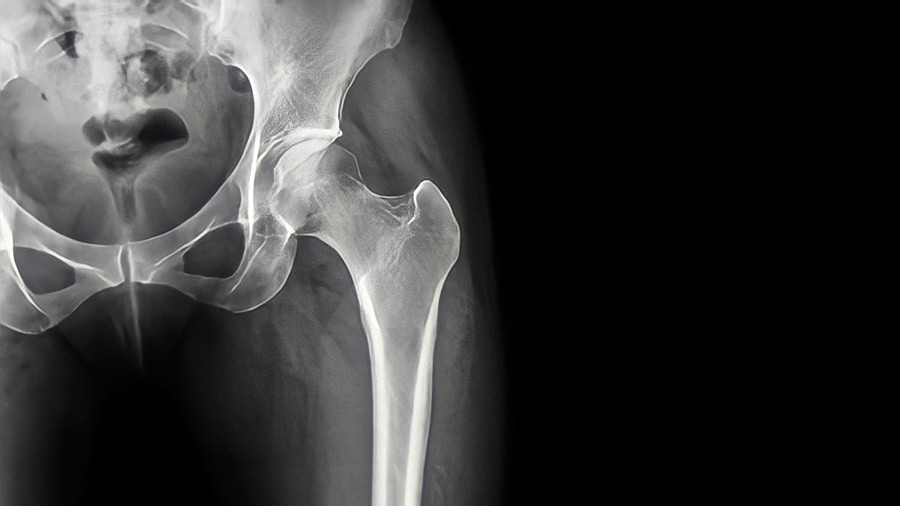

In [3]:
# import cv2
# import numpy as np

def compute_histogram(src):
    # Convert original image to HSV image (Hue, Saturation, Value)
    hsv_image = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

    # Extract the H and S channels
    h_plane = hsv_image[:, :, 0]
    s_plane = hsv_image[:, :, 1]
    planes = [h_plane, s_plane]

    # Define number of bins
    h_bins = 30
    s_bins = 32

    # Define histogram size
    hist_size = [h_bins, s_bins]

    # Hue varies from 0 (~0 deg red) to 180 (~360 deg red again)
    h_ranges = [0, 180]

    # Saturation varies from 0 (black-gray-white) to 255 (pure spectrum color)
    s_ranges = [0, 256]  # Updated saturation range to 256 to include the upper bound

    ranges = h_ranges + s_ranges  # Concatenating the ranges

    # Create histogram
    hist = cv2.calcHist(planes, [0, 1], None, hist_size, ranges, accumulate=False)

    cv2.normalize(hist, hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

    # Return histogram
    return hist


def compute_emd(hist1, hist2):
    # Compute the Earth Mover's Distance (EMD) between two histograms
    emd = cv2.EMD(hist1, hist2, cv2.DIST_L2)[0]
    return emd

In [4]:
scr1 = cv2.imread("healthy.jpg")
scr2 = cv2.imread("bad1.jpg")
scr3 = cv2.imread("bad2.jpg")
scr4 = cv2.imread("bad3.jpg")
scr5 = cv2.imread("bad4.jpg")

In [68]:
# Compute normalized histograms for two images (img1 and img2)
hist1 = compute_histogram(scr1)
hist2 = compute_histogram(scr2)
hist3 = compute_histogram(scr3)
hist4 = compute_histogram(scr4)
hist5 = compute_histogram(scr5)

# Calculate Earth Mover's Distance between the histograms
emd = compute_emd(hist1, hist2)
print("Earth Mover's Distance:", emd)

emd = compute_emd(hist1, hist3)
print("Earth Mover's Distance:", emd)

emd = compute_emd(hist1, hist4)
print("Earth Mover's Distance:", emd)

emd = compute_emd(hist1, hist5)
print("Earth Mover's Distance:", emd)

Earth Mover's Distance: 9.973768464988098e-05
Earth Mover's Distance: 0.00011101134441560134
Earth Mover's Distance: 0.00011995161912636831
Earth Mover's Distance: 0.00015351113688666373


In [81]:
import cv2
import numpy as np

def compute_histogram(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate histogram
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

    # Normalize histogram
    hist /= hist.sum()

    return hist

def distance_metric(bin1, bin2):
    # Custom distance metric (absolute difference)
    return abs(bin1 - bin2)

def compute_emd(image1, image2):
    # Compute histograms
    hist1 = compute_histogram(image1)
    hist2 = compute_histogram(image2)

    # Calculate the size of the histograms
    num_bins = len(hist1)

    # Construct the cost matrix
    cost = np.zeros((num_bins, num_bins), dtype=np.float32)
    for i in range(num_bins):
        for j in range(num_bins):
            cost[i, j] = distance_metric(hist1[i], hist2[j])

    # Calculate EMD using the constructed cost matrix
    emd = cv2.EMD(hist1, hist2, cv2.DIST_USER, cost)

    return emd

In [87]:
# Load the X-ray images
image1 = cv2.imread('healthy.jpg')
image2 = cv2.imread('bad1.jpg')
image3 = cv2.imread("bad2.jpg")
image4 = cv2.imread("bad3.jpg")
image5 = cv2.imread("bad4.jpg")

# Calculate the Earth Mover's Distance (EMD)
emd_distance = compute_emd(image1, image2)
print("Earth Mover's Distance:", emd_distance[0])

emd_distance = compute_emd(image1, image3)
print("Earth Mover's Distance:", emd_distance[0])

emd_distance = compute_emd(image1, image4)
print("Earth Mover's Distance:", emd_distance[0])

emd_distance = compute_emd(image1, image5)
print("Earth Mover's Distance:", emd_distance[0])

Earth Mover's Distance: 4.7295867261709645e-05
Earth Mover's Distance: 4.428746979101561e-05
Earth Mover's Distance: 5.368583515519276e-05
Earth Mover's Distance: 6.256982305785641e-05


In [103]:
# import cv2
# import numpy as np
# from scipy.optimize import linprog


# def emd_images(img1, img2):
#     # Histograms (Signatures)
#     nbins = 10
#     channel_a = cv2.calcHist([img1], [0], None, [nbins], [0, 256])   #channel 0 because is a greyscale
#     channel_b = cv2.calcHist([img2], [0], None, [nbins], [0, 256])

#     # Representatives of the clusters
#     f1 = np.arange(nbins)
#     f2 = np.arange(nbins)

#     # The weights
#     w1 = ca / np.sum(ca)
#     w2 = cb / np.sum(cb)

#     # EMD
#     f, fval = calculate_emd(f1, f2, w1, w2, distance)

#     return f, fval


# def calculate_emd(f1, f2, w1, w2, distance):
#     # Matrix distance to the floor
#     f = distance_matrix(f1, f2, distance)

#     m = len(f1)
#     n = len(f2)

#     # The restrictions
#     A1 = np.zeros((m, m * n))
#     A2 = np.zeros((n, m * n))

#     for i in range(m):
#         for j in range(n):
#             k = j + (i - 1) * n
#             A1[i, k] = 1
#             A2[j, k] = 1

#     A = np.vstack((A1, A2))
#     b = np.vstack((w1.reshape(-1, 1), w2.reshape(-1, 1)))

#     # Restrictions to equality
#     Aeq = np.ones((m + n, m * n))
#     beq = np.ones((m + n, 1)) * min(np.sum(w1), np.sum(w2))

#     # Lower limit
#     lb = np.zeros(m * n)

#     # linprog resolves the linear programming problem
#     res = linprog(f, A_ub=A, b_ub=b, A_eq=Aeq, b_eq=beq, bounds=(lb, None), method='highs')
#     x = res.x
#     fval = res.fun / np.sum(x)

#     return x, fval


# def distance_matrix(f1, f2):
#     m = len(f1)
#     n = len(f2)
#     f = np.zeros((m, n))

#     for i in range(m):
#         for j in range(n):
#             f[i, j] = calculate_distance(f1[i], f2[j])

#     f = f.T.flatten()  #transpose to colum vector and Return a copy of the array collapsed into one dimension.

#     return f


# def calculate_distance(v1, v2):
#     # Function that calculates the distance to the floor between the representatives
#     return np.linalg.norm(v1 - v2, 2)   #calculates eucledean distance

In [105]:
def distance_matrix(f1, f2):
    m = len(f1)
    n = len(f2)
    f = np.zeros((m, n))

    for i in range(m):
        for j in range(n):
            f[i, j] = calculate_distance(f1[i], f2[j])

    f = f.T.flatten()  #transpose to colum vector and Return a copy of the array collapsed into one dimension.

    return f


def calculate_distance(v1, v2):
    # Function that calculates the distance to the floor between the representatives
    return np.linalg.norm(v1 - v2, 2)


# Load images
img1 = cv2.imread("healthy.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("bad1.jpg", cv2.IMREAD_GRAYSCALE)

nbins = 10
#channels
ca = cv2.calcHist([img1], [0], None, [nbins], [0, 256])
cb = cv2.calcHist([img2], [0], None, [nbins], [0, 256])

# representatives
ha, _ = np.histogram(img1, bins=nbins)
hb, _ = np.histogram(img2, bins=nbins)

# Convert representatives to 2D arrays
f1 = np.column_stack((ha, np.zeros_like(ha)))
f2 = np.column_stack((hb, np.zeros_like(hb)))

#weight
w1 = ca / np.sum(ca)
w2 = cb / np.sum(cb)

In [106]:
calculate_distance(w1, w2)
distance_matrix(f1, f2)

array([1.00000e+01, 2.26867e+05, 2.23965e+05, 2.14506e+05, 2.29118e+05,
       2.31493e+05, 2.28307e+05, 2.34661e+05, 2.39667e+05, 2.48276e+05,
       2.26825e+05, 5.20000e+01, 2.85000e+03, 1.23090e+04, 2.30300e+03,
       4.67800e+03, 1.49200e+03, 7.84600e+03, 1.28520e+04, 2.14610e+04,
       2.23428e+05, 3.44900e+03, 5.47000e+02, 8.91200e+03, 5.70000e+03,
       8.07500e+03, 4.88900e+03, 1.12430e+04, 1.62490e+04, 2.48580e+04,
       2.13689e+05, 1.31880e+04, 1.02860e+04, 8.27000e+02, 1.54390e+04,
       1.78140e+04, 1.46280e+04, 2.09820e+04, 2.59880e+04, 3.45970e+04,
       2.27958e+05, 1.08100e+03, 3.98300e+03, 1.34420e+04, 1.17000e+03,
       3.54500e+03, 3.59000e+02, 6.71300e+03, 1.17190e+04, 2.03280e+04,
       2.32089e+05, 5.21200e+03, 8.11400e+03, 1.75730e+04, 2.96100e+03,
       5.86000e+02, 3.77200e+03, 2.58200e+03, 7.58800e+03, 1.61970e+04,
       2.29870e+05, 2.99300e+03, 5.89500e+03, 1.53540e+04, 7.42000e+02,
       1.63300e+03, 1.55300e+03, 4.80100e+03, 9.80700e+03, 1.841